<a href="https://colab.research.google.com/github/Gowsika19/Gowsika/blob/main/customer_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# price prediction dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/price.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
df.shape

(2000, 8)

DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [ ]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

REMOVE NULL VALUES

In [ ]:
df.drop(['Profession'],axis=1,inplace=True)

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income ($)         False
Spending Score (1-100)    False
Work Experience           False
Family Size               False
dtype: bool

CHECK DUPLICATE VALUES

In [ ]:
df.duplicated().any()

False

CHECK MIN AND MAX VALUES

In [ ]:
df.max()

CustomerID                  2000
Gender                      Male
Age                           99
Annual Income ($)         189974
Spending Score (1-100)       100
Work Experience               17
Family Size                    9
dtype: object

In [ ]:
df.min()

CustomerID                     1
Gender                    Female
Age                            0
Annual Income ($)              0
Spending Score (1-100)         0
Work Experience                0
Family Size                    1
dtype: object

DATA INTEGRATION

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
CustomerID,1.000000,0.070700,0.328400,0.018936,0.091574,0.159655
Age,0.070700,1.000000,0.021378,-0.041798,-0.014319,0.038254
Annual Income ($),0.328400,0.021378,1.000000,0.023299,0.089136,0.093005
Spending Score (1-100),0.018936,-0.041798,0.023299,1.000000,-0.028948,0.002232
Work Experience,0.091574,-0.014319,0.089136,-0.028948,1.000000,0.011873
Family Size,0.159655,0.038254,0.093005,0.002232,0.011873,1.000000


In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


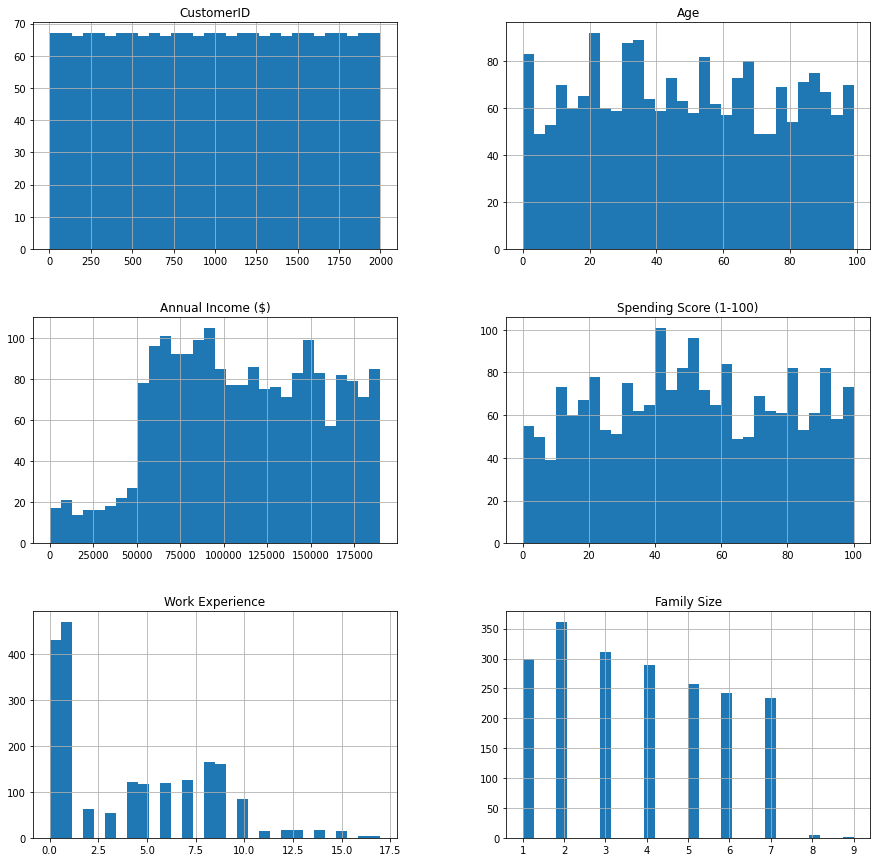

In [ ]:
df.hist(bins=30, figsize=(15,15))
plt.show()

BIVARIATE ANALYSIS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


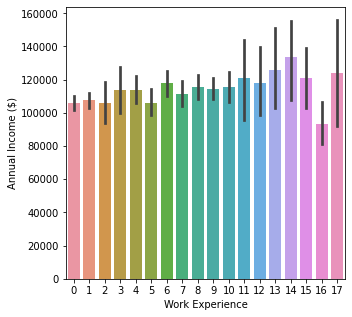

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(df['Work Experience'],df['Annual Income ($)'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


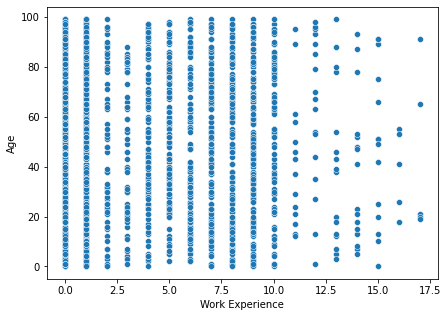

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(df['Work Experience'],df['Age'])
plt.show()

In [ ]:
card_approval_df=pd.read_csv("/content/price.csv")
print(card_approval_df.head(10))

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   
5           6  Female   22              58000                      76   
6           7  Female   35              31000                       6   
7           8  Female   23              84000                      94   
8           9    Male   64              97000                       3   
9          10  Female   30              98000                      72   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  


<AxesSubplot:xlabel='Age', ylabel='Count'>

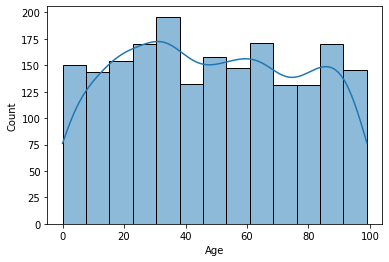

In [ ]:
sns.histplot(card_approval_df.Age,kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

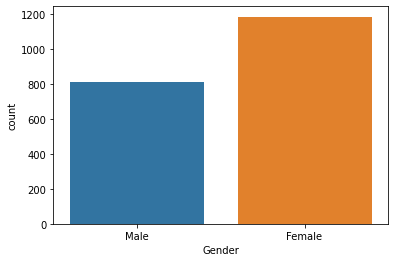

In [ ]:
sns.countplot(card_approval_df.Gender)

<AxesSubplot:xlabel='Age', ylabel='Annual Income ($)'>

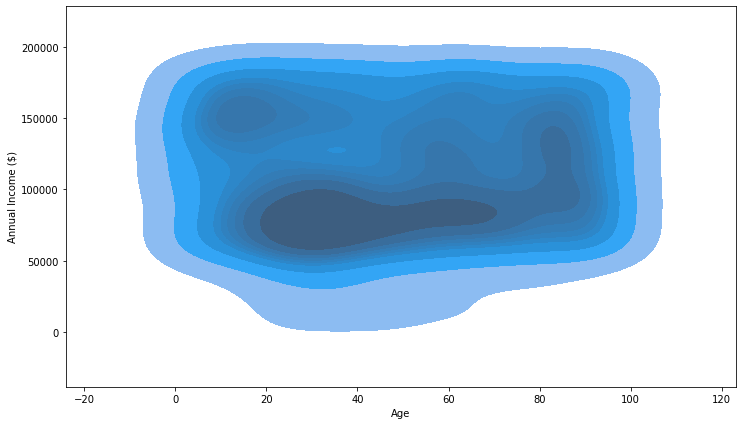

In [ ]:
  plt.figure(figsize=(12,7))
  sns.kdeplot(data=card_approval_df,x='Age',y='Annual Income ($)',fill=True)

MULTIVARIATE ANALYSIS

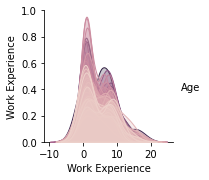

In [ ]:
sns.pairplot(data=card_approval_df[['Age','Work Experience']],hue='Age')

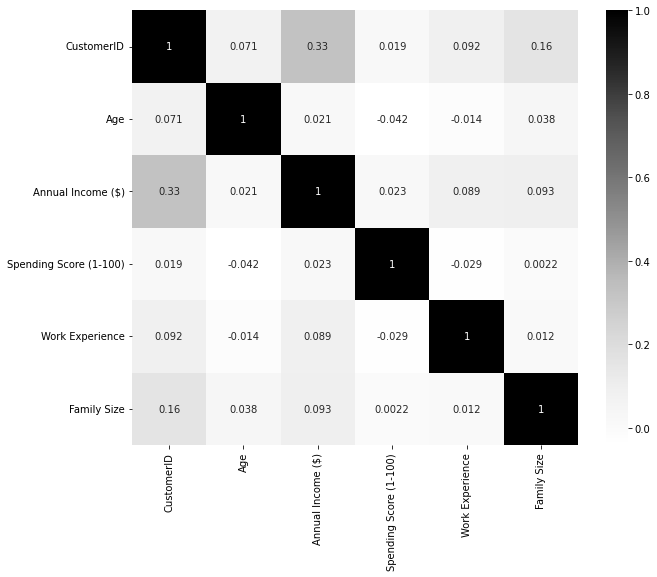

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Greys")
plt.show()

In [ ]:
y=df['Family Size']
y

0       4
1       3
2       1
3       2
4       6
       ..
1995    7
1996    7
1997    2
1998    2
1999    2
Name: Family Size, Length: 2000, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [ ]:
df['Gender']

0       0
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    0
Name: Gender, Length: 2000, dtype: int64

In [ ]:
x=df.drop('Family Size',axis=1)
x

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Sex
0,1,0,19,15000,39,1,0
1,2,0,21,35000,81,3,0
2,3,1,20,86000,6,1,1
3,4,1,23,59000,77,0,1
4,5,1,31,38000,40,2,1
...,...,...,...,...,...,...,...
1995,1996,1,71,184387,40,8,1
1996,1997,1,91,73158,32,7,1
1997,1998,0,87,90961,14,9,0
1998,1999,0,77,182109,4,7,0


In [ ]:
y=df['Family Size']
y

0       4
1       3
2       1
3       2
4       6
       ..
1995    7
1996    7
1997    2
1998    2
1999    2
Name: Family Size, Length: 2000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array([2, 2, 6, 2, 2, 2, 2, 2, 6, 6, 2, 6, 2, 6, 2, 2, 2, 2, 6, 2, 2, 2,
       2, 6, 6, 6, 2, 2, 6, 6, 6, 2, 6, 2, 2, 6, 2, 2, 6, 2, 6, 6, 2, 6,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 6, 2, 6, 6, 2,
       2, 2, 6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       6, 6, 2, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 6, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 2, 2,
       2, 2, 6, 6, 2, 6, 6, 2, 6, 2, 2, 6, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 6, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2,
       2, 2, 6, 6, 2, 2, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 6, 2, 6, 6, 2, 6, 2, 2, 6, 2, 6, 2, 6, 6, 2, 2, 6,
       2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 6, 2, 2, 6, 2,
       2, 2, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 2, 2, 2, 6, 6, 2, 2, 2,
       6, 2, 2, 2, 2, 6, 2, 6, 6, 2, 6, 6, 2, 6, 2,